In [1]:
%matplotlib inline
import os
os.environ['DATA_PATH'] = "/root/work/data"
import matplotlib.pyplot as plt
from invoke import task
from collections import OrderedDict
import numpy as np
from model import build_dense, build_conv, build_dense_resid, build_ciresan
import theano
import theano.tensor as T
from lasagne import layers, objectives, updates
from lasagnekit.datasets.mnist import MNIST
from lasagnekit.datasets.infinite_image_dataset import Transform
from helpers import iterate_minibatches, flip, rotate_scale, rotate_scale_one, elastic_transform, elastic_transform_one
from tabulate import tabulate
from time import time

In [2]:
print('Loading data...')
w, h, c = 28, 28, 1
def preprocess(data):
    return data.reshape((data.shape[0], c, w, h))

train = MNIST(which='train')
train.load()
train.X = preprocess(train.X)
train.X = train.X[0:128]
train.y = train.y[0:128]

test = MNIST(which='test')
test.load()
test.X = preprocess(test.X)

Loading data...


In [23]:
from lasagnekit.misc.plot_weights import tile_raster_images
#x = train.X[10].reshape((1, 28, 28))
#x = np.repeat(x, 100, axis=0)
x = train.X[:, 0]
x_before = x.copy()

x = rotate_scale(
    x,
    min_angle=-15, max_angle=15,
    min_scale=0.85, max_scale=1.15)

x = elastic_transform(
    x, min_alpha=36, max_alpha=38, min_sigma=4, max_sigma=6)

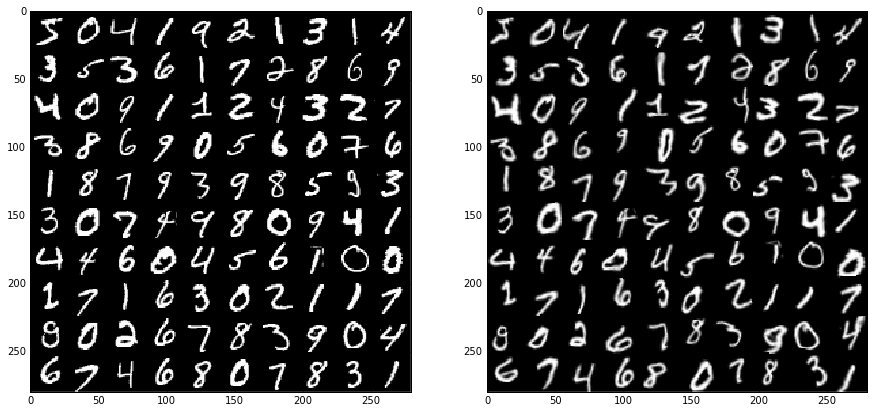

In [24]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(tile_raster_images(x_before, (28, 28), (10, 10)), cmap='gray', interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(tile_raster_images(x, (28, 28), (10, 10)), cmap='gray', interpolation='none')

(array([ 7.90925941,  0.28380102,  0.20667251,  0.18375319,  0.18006617,
         0.17059949,  0.19441566,  0.21863042,  0.2736368 ,  0.37916534]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

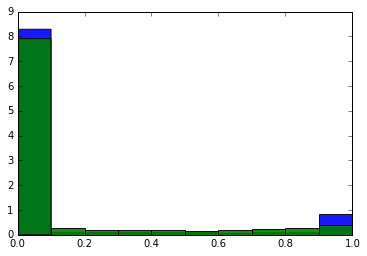

In [ ]:
plt.hist(x_before.flatten(), normed=True, alpha=0.9)
plt.hist(x.flatten(), normed=True, alpha=0.9)